# Check simpleemulator data grid
===================================================================================

- Sylvie Dagoret-Campagne
- affliliation : IJCLAB/IN2P3/CNRS
- creation date :  24 October 2023
- Last verification : October 24th 2023

===================================================================================

In [1]:
# Import some generally useful packages

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
import pandas as pd
from itertools import cycle, islice
import seaborn as sns

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)


In [3]:
from scipy import interpolate

In [4]:
from simpleemulator.simpleatmemulator import SimpleAtmEmulator,find_data_path,final_path_data
from simpleemulator.simpleatmemulator import Dict_Of_sitesAltitudes,Dict_Of_sitesPressures

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
List_Of_All_sites = list(Dict_Of_sitesPressures.keys()) 
List_Of_All_sites 

['LSST', 'CTIO', 'OHP', 'PDM', 'OMK', 'OSL']

# Configuration

In [7]:
site = 'LSST'
#path = find_data_path()
path = final_path_data
emul  = SimpleAtmEmulator(obs_str=site)

Observatory LSST found in preselected observation sites


In [8]:
file1_in = os.path.join(path,emul.fn_rayleigh_training)
file2_in = os.path.join(path,emul.fn_rayleigh_test)

In [9]:
file3_in = os.path.join(path,emul.fn_O2abs_training)
file4_in = os.path.join(path,emul.fn_O2abs_test)

In [10]:
file5_in = os.path.join(path,emul.fn_PWVabs_training)
file6_in = os.path.join(path,emul.fn_PWVabs_test)

In [11]:
file7_in = os.path.join(path,emul.fn_OZabs_training)
file8_in = os.path.join(path,emul.fn_OZabs_test)

### wavelength

In [40]:
emul.WLMIN

300.0

In [45]:
WLMIN = emul.WLMIN
WLMAX = emul.WLMAX
WLBIN = emul.WLBIN
NWLBIN = emul.NWLBIN
WL= emul.GetWL()

In [44]:
WLMIN_test = emul.WLMIN_test
WLMAX_test = emul.WLMAX_test
WLBIN = emul.WLBIN_test
NWLBIN_test = emul.NWLBIN_test
WL_test= emul.WL_test

### airmass

In [47]:
AIRMASSMIN = emul.AIRMASSMIN
AIRMASSMAX= emul.AIRMASSMAX
DAM = emul.DAIRMASS

In [48]:
airmasses = np.arange(AIRMASSMIN,AIRMASSMAX,DAM)

In [49]:
airmasses

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4])

In [50]:
NAM=len(airmasses)

In [51]:
sequential_colors = sns.color_palette("hls", NAM)

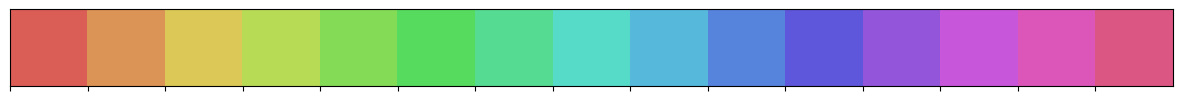

In [52]:
sns.palplot(sequential_colors)

In [53]:
airmass_training = airmasses
airmass_test = airmasses + DAM/2.

In [54]:
NX=len(airmasses)
NY=NWLBIN

### PWV

In [55]:
PWVMIN = emul.PWVMIN
PWVMAX = emul.PWVMAX
DPWV = emul.DPWV

In [56]:
pwv_training = np.arange(PWVMIN,PWVMAX,DPWV)
pwv_test = pwv_training + DPWV/2.

In [57]:
NPWV = len(pwv_training)

### OZON

In [58]:
OZMIN = emul.OZMIN
OZMAX = emul.OZMAX
DOZ   = emul.DOZ

In [59]:
oz_training = np.arange(OZMIN,OZMAX,DOZ)
oz_test = oz_training  + DOZ/2.

In [60]:
NOZ = len(oz_training)

### Data

In [62]:
with open(file1_in, 'rb') as f:
    data_rayleigh_training=np.load(f)
with open(file2_in, 'rb') as f:    
    data_rayleigh_test=np.load(f)
with open(file3_in, 'rb') as f:  
    data_O2abs_training=np.load(f)
with open(file4_in, 'rb') as f:     
    data_O2abs_test=np.load(f)

Text(0.5, 1.0, 'Rayleigh training profiles')

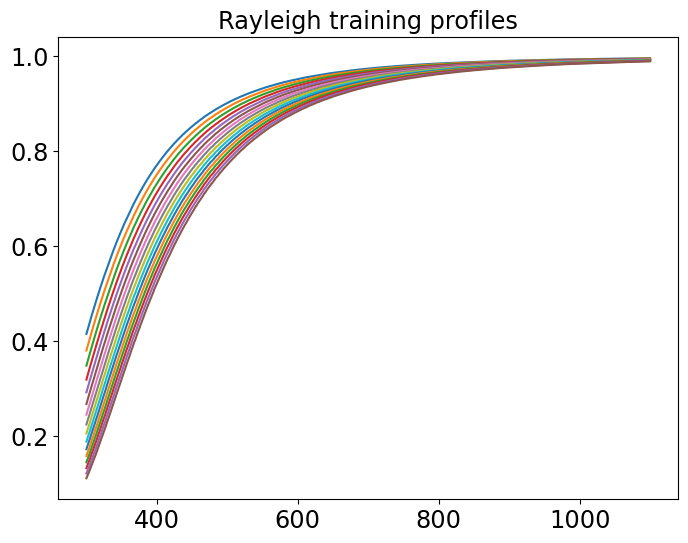

In [63]:
plt.plot(WL,data_rayleigh_training[:,:]);
plt.title("Rayleigh training profiles")

Text(0.5, 1.0, 'Rayleigh test profiles')

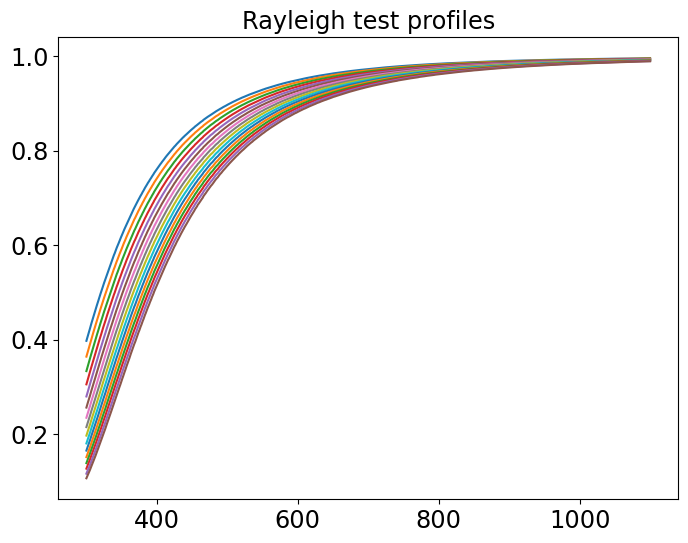

In [65]:
plt.plot(WL,data_rayleigh_test[:,:]);
plt.title("Rayleigh test profiles")

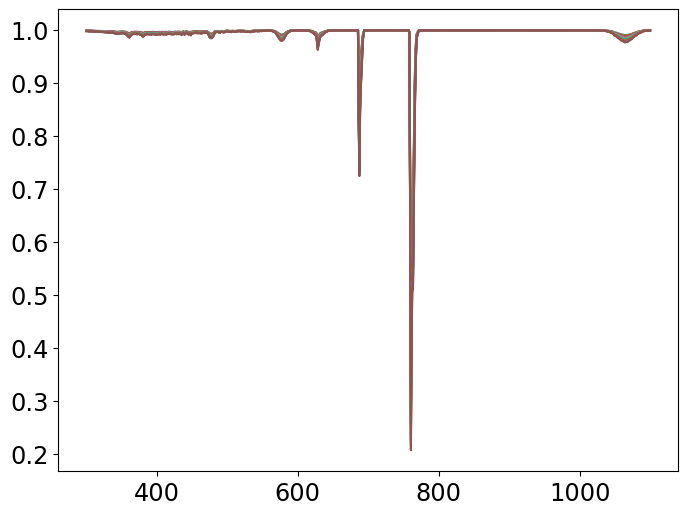

In [30]:
plt.plot(WL,data_O2abs_training[:,:]);
plt.title("O2 absorption training profiles")

Text(0.5, 1.0, 'O2 absorption test profiles')

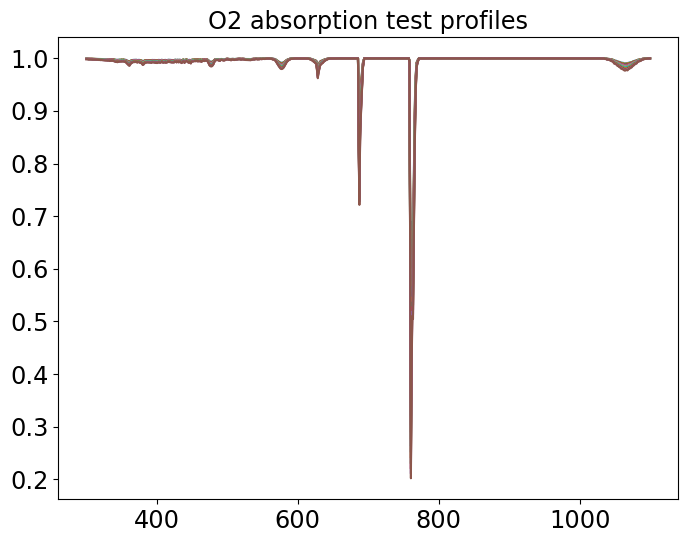

In [66]:
plt.plot(WL,data_O2abs_test[:,:]);
plt.title("O2 absorption test profiles")

In [32]:
with open(file5_in, 'rb') as f:
    data_H2Oabs_training=np.load(f)
with open(file6_in, 'rb') as f:
    data_H2Oabs_test=np.load(f)

In [33]:
with open(file7_in, 'rb') as f:
    data_OZabs_training=np.load(f)
with open(file8_in, 'rb') as f:    
    data_OZabs_test=np.load(f)

Text(0.5, 1.0, 'H2O absorption training profiles')

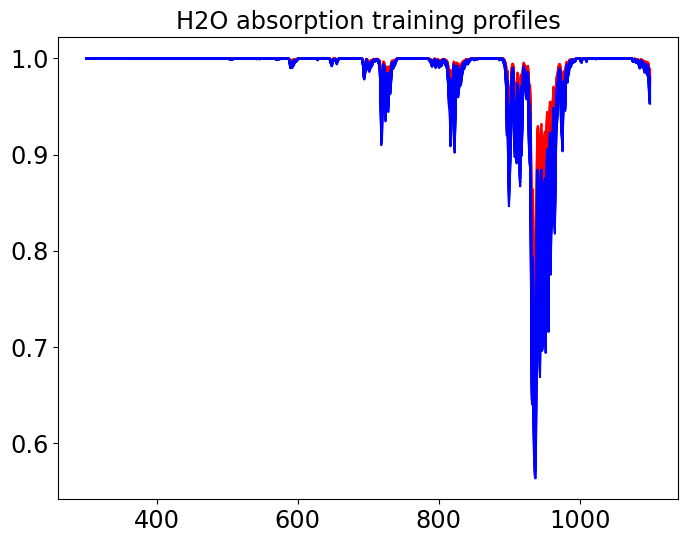

In [67]:
plt.plot(WL,data_H2Oabs_training[:,:,5],'r');
plt.plot(WL,data_H2Oabs_training[:,:,9],'b');
plt.title("H2O absorption training profiles")

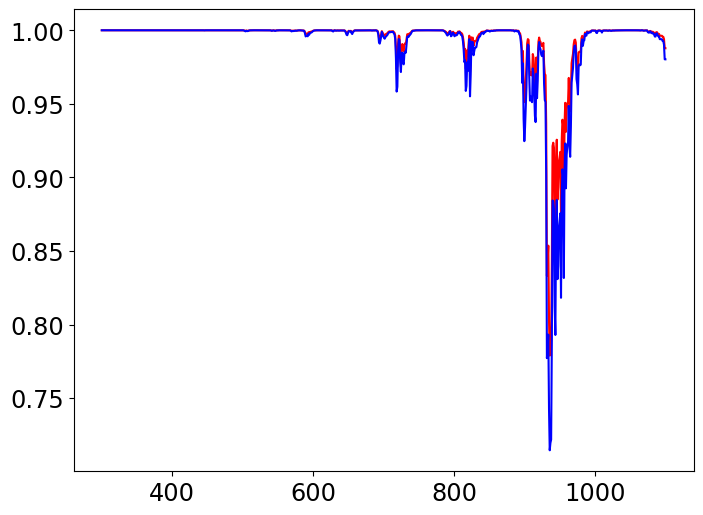

In [36]:
plt.plot(WL,data_H2Oabs_training[:,1,5],'r');
plt.plot(WL,data_H2Oabs_training[:,8,5],'b');
plt.title("H2O absorption training profiles")

Text(0.5, 1.0, 'H2O absorption test profiles')

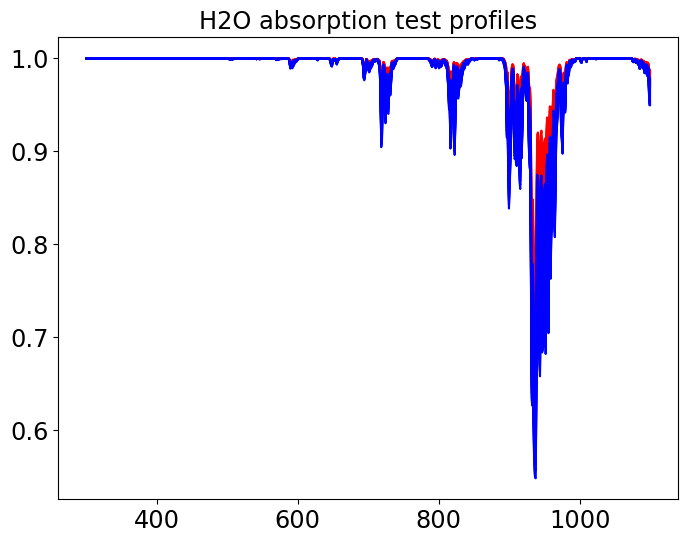

In [68]:
plt.plot(WL_test,data_H2Oabs_test[:,:,5],'r');
plt.plot(WL_test,data_H2Oabs_test[:,:,9],'b');
plt.title("H2O absorption test profiles")

Text(0.5, 1.0, 'H2O absorption test profiles')

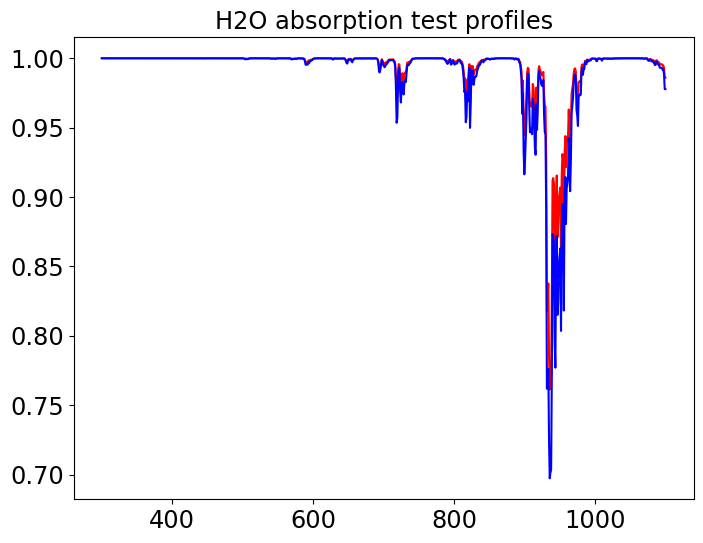

In [69]:
plt.plot(WL_test,data_H2Oabs_test[:,1,5],'r');
plt.plot(WL_test,data_H2Oabs_test[:,8,5],'b');
plt.title("H2O absorption test profiles")

In [71]:
(WL-WL_test)[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])